In [6]:
import torch
import torch.nn as nn

!pip install "opencv-python"
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 14.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [7]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159)

integer

tensor(1234)

In [8]:
integer.ndim

0

In [9]:
decimal.ndim

0

In [10]:
decimal

tensor(3.1416)

In [12]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_100 = torch.tensor(range(100))

print(f"fibonacci is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"count_100 is a {count_100.ndim}-d Tensor with shape: {count_100.shape}")

fibonacci is a 1-d Tensor with shape: torch.Size([6])
count_100 is a 1-d Tensor with shape: torch.Size([100])


In [41]:
matrix = torch.zeros(2, 6)

assert isinstance(matrix, torch.Tensor)
assert matrix.ndim == 2

images = torch.zeros(10, 3, 256, 256)

assert isinstance(images, torch.Tensor)
assert images.ndim == 4
assert images.shape == (10, 3, 256, 256)

In [42]:
images.ndim

4

In [43]:
images.shape

torch.Size([10, 3, 256, 256])

In [45]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"matrix: {matrix}")
print(f"row: {row_vector}")
print(f"column: {column_vector}")
print(f"scalar: {scalar}")

matrix: tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
row: tensor([0., 0., 0., 0., 0., 0.])
column: tensor([0., 0.])
scalar: 0.0


In [47]:
a = torch.tensor(15)
b = torch.tensor(61)

c1 = torch.add(a, b)
c2 = a + b # PyTorch overrides `+`
print(f"c1: {c1}")
print(f"c2: {c2}")

c1: 76
c2: 76


In [48]:
def func(a, b):
    c = a + b
    d = b - 1
    e = c * d
    return e

In [49]:
a, b = 1.5, 2.5
e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 6.0


In [52]:
class DenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(DenseLayer, self).__init__()
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        z = torch.matmul(x, self.W)
        y = torch.sigmoid(z)
        return y

In [56]:
num_inputs = 2
num_outputs = 3
layer = DenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.9444, 0.8539, 0.6253]], grad_fn=<SigmoidBackward0>)


In [58]:
n_input_nodes = 2
n_output_nodes = 3
model = nn.Sequential(
    nn.Linear(n_input_nodes, n_output_nodes),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Sigmoid()
)


In [60]:
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.9444, 0.8539, 0.6253]], grad_fn=<SigmoidBackward0>)


In [63]:
# subclassing
class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output

In [65]:
n_input_nodes = 2
n_output_nodes = 3

model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.7571, 0.7855, 0.4174]], grad_fn=<SigmoidBackward0>)


In [66]:
class LinearIndentity(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearIndentity, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, inputs, isIdentity=False):
        if isIdentity:
            return inputs
        return self.linear(inputs)

In [70]:
model = LinearIndentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([[1, 2.]])

linear = model(x_input, False)
identity = model(x_input, True)

print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(linear, identity))

input: tensor([[1., 2.]])
Network linear output: tensor([[ 0.3676,  1.4980, -1.2833]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


In [73]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


Init x=-1.57973313331604


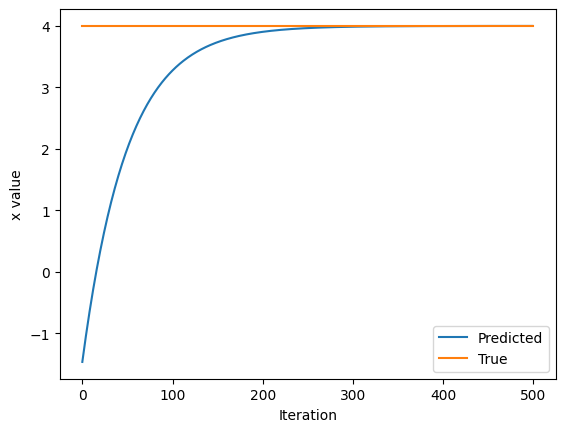

In [75]:
x = torch.randn(1)
print(f"Init x={x.item()}")

learning_rate = 1e-2
history = []
x_f = 4 # target

for i in range(500):
    x = torch.tensor([x], requires_grad=True)
    loss = (x - x_f) ** 2
    loss.backward()
    # update x with gradient descent
    x = x.item() - learning_rate * x.grad
    history.append(x.item())

plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(("Predicted", "True"))
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.show()